In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# Decoding the signal

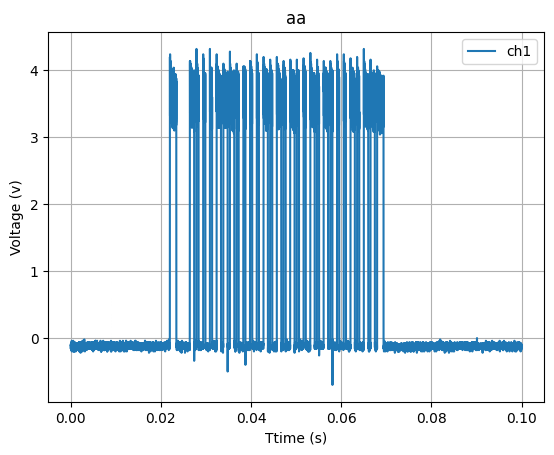

In [2]:
df=pd.read_csv("../data/PIN3.isf")
df=pd.DataFrame(df.values, columns=("time","ch1"))
df.time=df.time-df.time.values[0]
df.plot(x="time", y="ch1")
plt.title("aa")
plt.xlabel("Ttime (s)")
plt.ylabel("Voltage (v)")
plt.grid()

In [3]:
df=pd.read_csv("../data/PIN3.isf")
df=pd.DataFrame(df.values, columns=("time","ch1"))
df.time=df.time-df.time.values[0]

In [4]:
df["ch1_saturation"]=(df.ch1>1.5).astype(int)
df.head()

,time,ch1,ch1_saturation
0,0.00000,-0.10,0
1,0.00001,-0.16,0
2,0.00002,-0.16,0
3,0.00003,-0.10,0
4,0.00004,-0.10,0


In [5]:
df["ch1_threshold"]=df["ch1_saturation"]-2

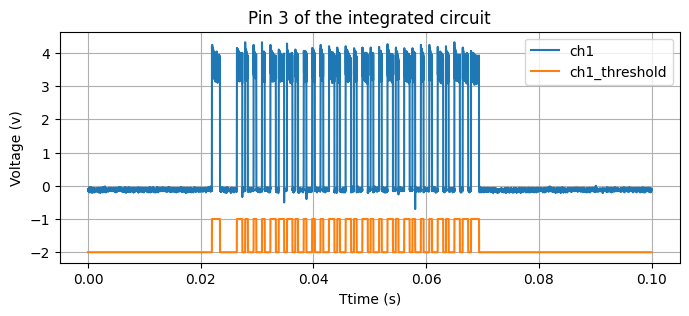

In [6]:
fig, ax= plt.subplots(figsize=(8,3))
df.plot(x="time", y=["ch1" , "ch1_threshold"], ax=ax)
plt.title("Pin 3 of the integrated circuit")
plt.xlabel("Ttime (s)")
plt.ylabel("Voltage (v)")
plt.grid()

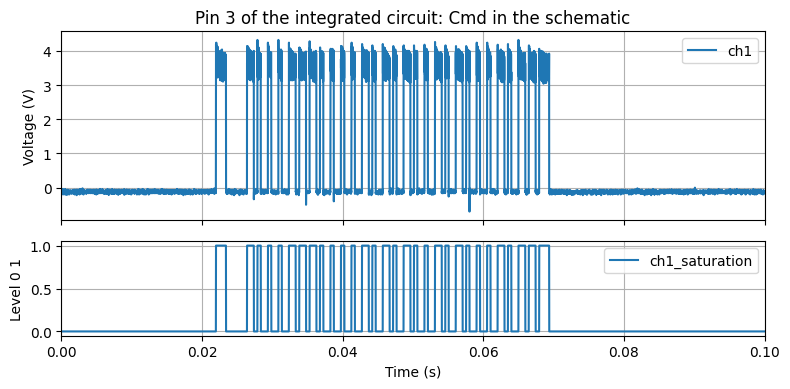

In [7]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 4), sharex=True,
    gridspec_kw={'height_ratios': [4, 2]}  # Adjust height ratios for ax1 and ax2
)

# First subplot (size 8x4 ratio)
df.plot(x="time", y=["ch1"], ax=ax1)
ax1.set_title("Pin 3 of the integrated circuit: Cmd in the schematic")
ax1.set_ylabel("Voltage (V)")
ax1.grid()

# Second subplot (size 8x2 ratio)
df.plot(x="time", y=["ch1_saturation"], ax=ax2)
ax2.set_xlabel("Time (s)")  # X label only on the bottom subplot
ax2.set_ylabel("Level 0 1")
ax2.grid()

plt.xlim([0,0.1])
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.savefig("transmittedPin3.jpg")
plt.show()


In [8]:
transitions = df[df['ch1_saturation'].shift() != df['ch1_saturation']].dropna()

In [9]:
bits=(transitions-transitions.shift()).time.dropna().iloc[1:]
time_of_bit=bits.min()
time_of_bit

0.0004799999999999943

In [10]:
1/0.0004799999999999943

2083.333333333358

In [11]:
a=transitions.time.values
timeOfSequance=a[-1]-a[1]
timeOfSequance

0.047380000000000005

In [12]:
timeOfSequance/time_of_bit

98.70833333333451

In [13]:
bits10=(bits/time_of_bit).round().values.astype(int)
b=1
bitsarr=[]
for i in bits10: 
    for j in range( i): 
        bitsarr.append(str(b))
    b=int(not (b))
bitstr="".join(bitsarr)
bitstr

'111000000110100100100110110110100100100100110100110100110100100110100110100100100110100110110111'

In [14]:
len(bitstr)

96

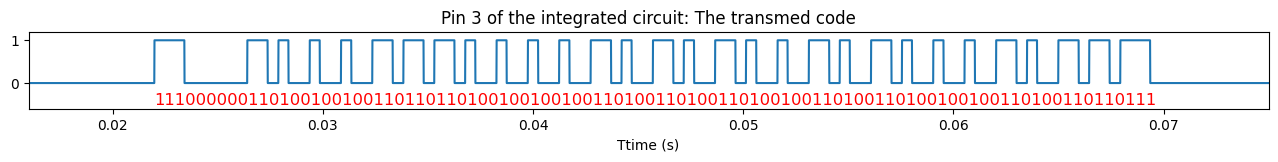

In [15]:
fig, ax= plt.subplots(figsize=(16,1))
df.plot(x="time", y=[ "ch1_saturation"], ax=ax)
plt.title("Pin 3 of the integrated circuit: The transmed code")
plt.xlabel("Ttime (s)")
plt.ylabel("")
ax.text(0.0458, -0.4, bitstr, fontsize=11.8, ha='center', va='center', color='red')
plt.xlim([0.016,0.075])
plt.ylim([-0.6,1.2])
ax.legend_.remove()
plt.savefig("transmittedCode.jpg")
plt.show()
#plt.grid()

# FFT of the signal

In [16]:
df2=pd.read_csv("../data/SignalModulation.isf")
df2=pd.DataFrame(df2.values, columns=("time","ch1"))
df2.time=df2.time-df2.time.values[0]
df2.head()

,time,ch1
0,0.000000e+00,13.1497
1,1.000000e-09,13.4775
2,2.000000e-09,13.7934
3,3.000000e-09,13.7997
4,4.000000e-09,13.8394


In [17]:
df2.columns

Index(['time', 'ch1'], dtype='object')

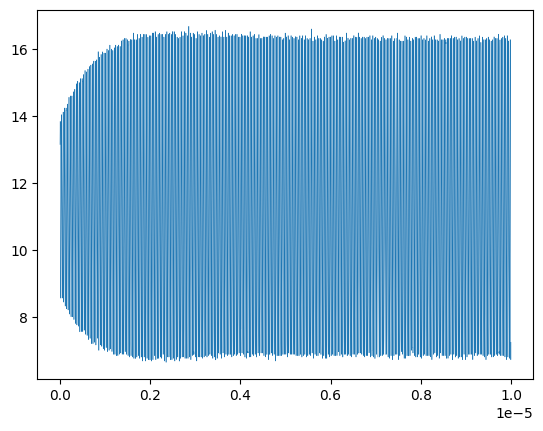

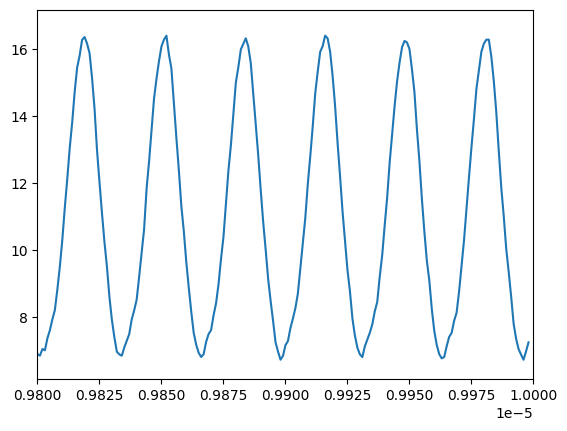

FS 1000000000.0 Ts 1e-09


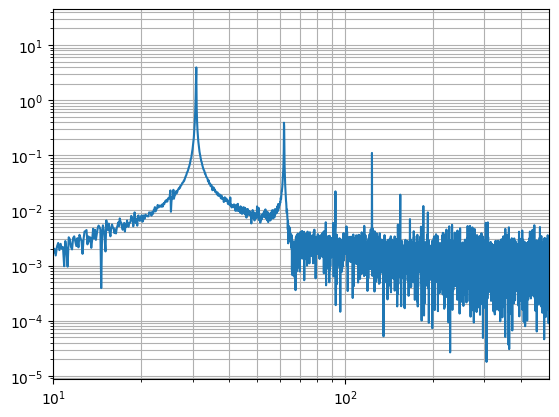

In [18]:
from scipy.fft import fft, fftfreq



x=df2.time.values
y=df2.ch1.values

plt.plot(x,y, linewidth=0.4)
#plt.xlim([,])
plt.show()

plt.plot(x,y)
plt.xlim([0.98e-5,1e-5])
plt.show()

yf = fft(y)
N=len(y)
fs=(len(x)-1)/(x[-1]-x[0])
print("FS",fs,"Ts",1/fs)
xf = fftfreq(N, 1/fs)[:N//2] 
yfft=2.0/N * np.abs(yf[0:N//2])
xf=xf/1e6
plt.loglog(xf,yfft)
plt.grid(which='major')
plt.grid(which='minor')
plt.xlim([10,xf.max() ])
plt.show()



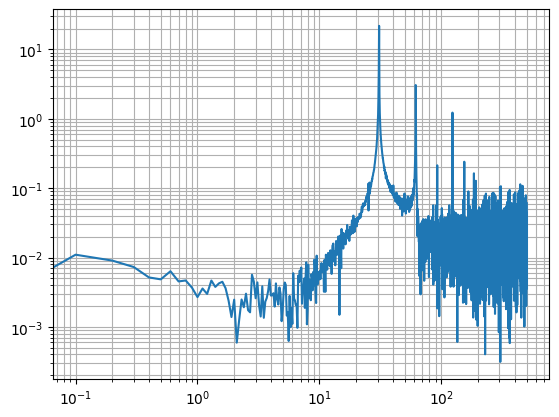

In [19]:
plt.loglog(xf,yfft*np.sqrt(xf))
plt.grid(which='major')
plt.grid(which='minor')

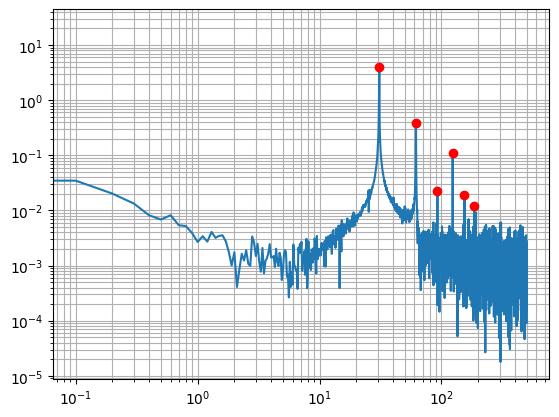

In [20]:
from scipy.signal import find_peaks

y=yfft*np.sqrt(xf)
peaks, _ = find_peaks(y,prominence=0.01, height=.15, distance=100)
"""
prominence: Measures how much a peak stands out relative to its surrounding area.
height: Sets a minimum y y-value for peaks.
distance: Specifies the minimum horizontal distance between adjacent peaks.
"""

# Extract peak coordinates
peak_x = xf[peaks]
peak_y = yfft[peaks]
plt.loglog(xf,yfft)
plt.grid(which='major')
plt.grid(which='minor')
#plt.xlim([10,xf.max() ])
plt.loglog(peak_x,peak_y,'ro')
plt.show()

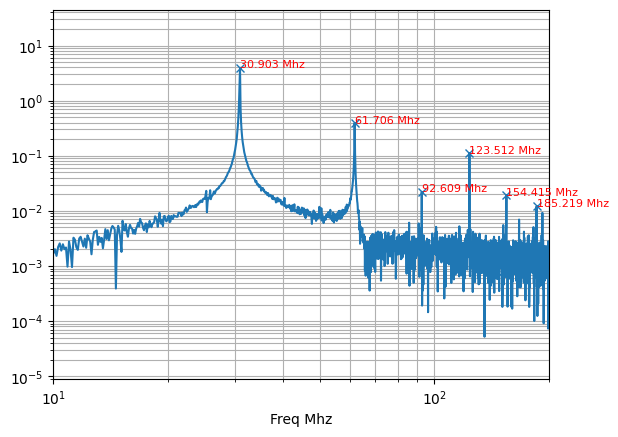

In [21]:
plt.loglog(xf,yfft)
plt.grid(which='major')
plt.grid(which='minor')
for x,y in zip(peak_x  , peak_y):
    plt.text(x,y, str(round(x,3))+" Mhz", fontsize = 8, c='r')
plt.xlim([10,200 ])
plt.loglog(peak_x,peak_y,'x',c='C0')
plt.xlabel("Freq Mhz")
plt.show()

FS 1000000000.0 Ts 1e-09


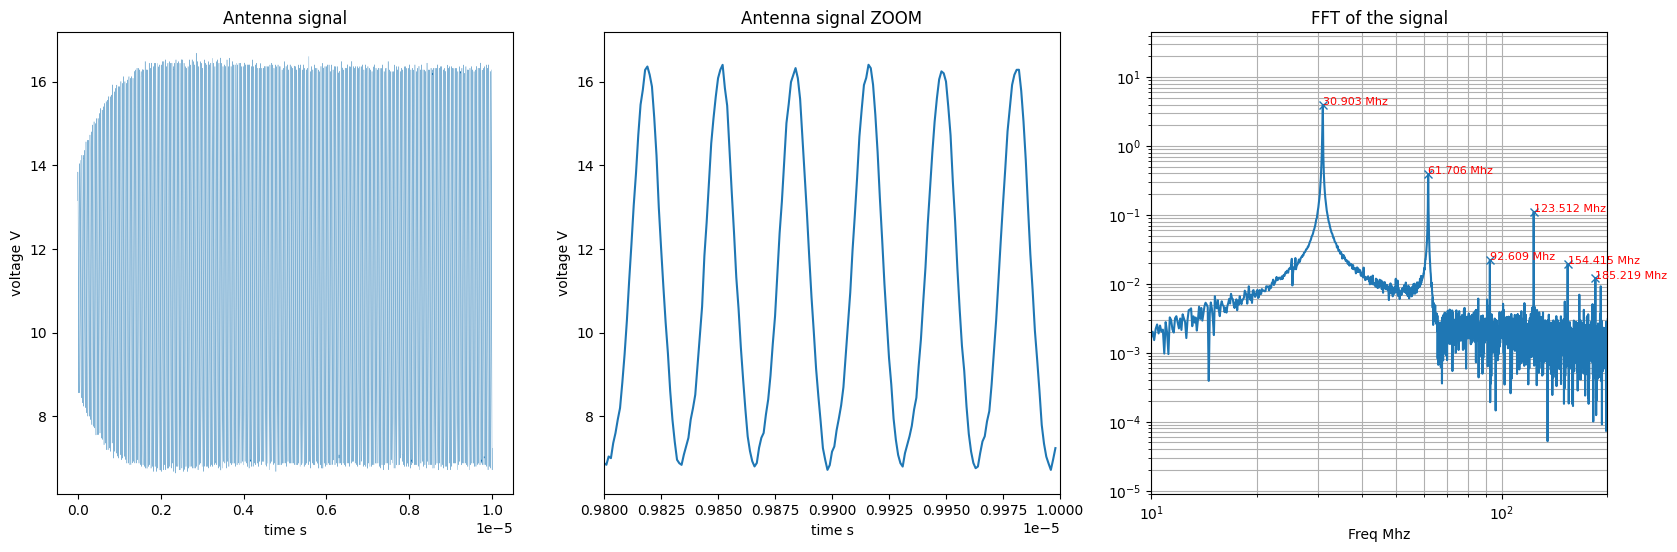

In [22]:
from scipy.fft import fft, fftfreq


fig, axs=plt.subplots(1,3, figsize=(20,6))
x=df2.time.values
y=df2.ch1.values

ax=axs[0]
ax.plot(x,y, linewidth=0.2)
ax.set_xlabel("time s")
ax.set_ylabel("voltage V")
ax.set_title("Antenna signal")

ax=axs[1]
ax.plot(x,y)
ax.set_xlim([0.98e-5,1e-5])
ax.set_xlabel("time s")
ax.set_ylabel("voltage V")
ax.set_title("Antenna signal ZOOM")


yf = fft(y)
N=len(y)
fs=(len(x)-1)/(x[-1]-x[0])
print("FS",fs,"Ts",1/fs)
xf = fftfreq(N, 1/fs)[:N//2] 
yfft=2.0/N * np.abs(yf[0:N//2])
xf=xf/1e6







ax=axs[2]
ax.loglog(xf,yfft)
ax.grid(which='major')
ax.grid(which='minor')
for x,y in zip(peak_x  , peak_y):
    ax.text(x,y, str(round(x,3))+" Mhz", fontsize = 8, c='r')
ax.set_xlim([10,200 ])
ax.loglog(peak_x,peak_y,'x',c='C0')
ax.set_xlabel("Freq Mhz")
ax.set_title("FFT of the signal")
plt.savefig("transmittedSignal.jpg")
plt.show()